# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Elijah Ayandotun Aremu</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values

In [4]:
data["DataPlan"].unique()

array([1, 0])

In [3]:
data["ContractRenewal"].unique()

array([1, 0])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

In [7]:
# Our label Distribution (countplot)


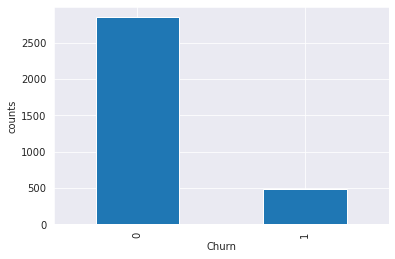

In [13]:
data["Churn"].value_counts().plot.bar()
plt.ylabel('counts')
plt.xlabel('Churn')
plt.show()

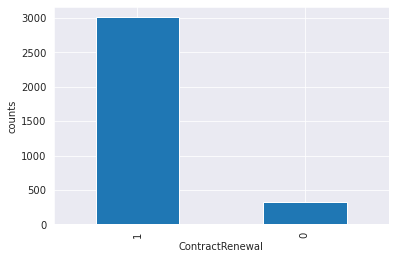

In [14]:
data["ContractRenewal"].value_counts().plot.bar()
plt.ylabel("counts")
plt.xlabel("ContractRenewal")
plt.show()

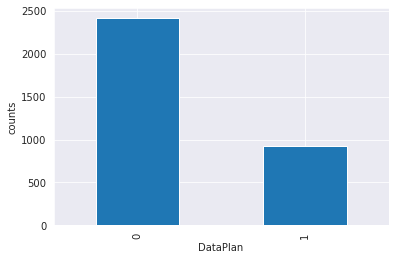

In [15]:
data["DataPlan"].value_counts().plot.bar()
plt.ylabel("counts")
plt.xlabel("DataPlan")
plt.show()

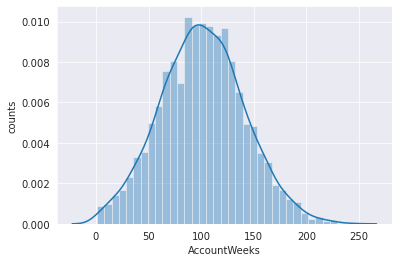

In [16]:
# Example EDA
sns.distplot(data["AccountWeeks"])
plt.ylabel("counts")
plt.show()

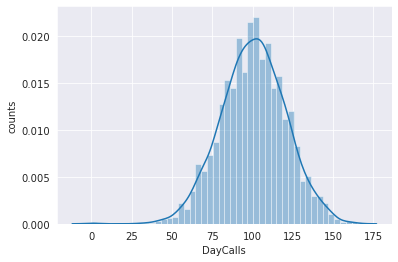

In [17]:
# Example EDA 2
sns.distplot(data["DayCalls"])
plt.ylabel("counts")
plt.show()

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

# Are there any duplicated values?

In [18]:
# Check for duplicated values
data.duplicated().sum()

0

No, there are no Duplicate values in the dataset

# Do we need to do feature scaling?

yes. the features would be scaled

In [20]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df = std.fit_transform(data.drop(columns = ["Churn","ContractRenewal","DataPlan"]))


In [23]:
df

array([[ 0.67648946,  1.48020373, -0.42793202, ...,  1.99072703,
        -0.0715836 , -0.08500823],
       [ 0.14906505,  2.26607248, -0.42793202, ...,  1.56451025,
        -0.10708191,  1.24048169],
       [ 0.9025285 , -0.64164192, -1.1882185 , ..., -0.26213309,
        -1.57434567,  0.70312091],
       ...,
       [-1.83505538, -0.64164192,  0.33235445, ..., -0.01858065,
         1.73094204,  1.3837779 ],
       [ 2.08295458, -0.64164192,  0.33235445, ..., -0.38390932,
        -0.81704825, -1.87621082],
       [-0.67974475,  2.26607248, -1.1882185 , ...,  2.66049626,
         1.28129669,  1.24048169]])

In [25]:
dfs = pd.DataFrame(columns = ('AccountWeeks','CustServCalls', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'), data =df)

In [26]:
dfs.head()

,AccountWeeks,CustServCalls,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.676489,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008
1,0.149065,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482
2,0.902529,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121
3,-0.428590,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026
4,-0.654629,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184


In [27]:
dfs["Churn"] = data["Churn"]

In [28]:
dfs["ContractRenewal"] = data["ContractRenewal"]

In [29]:
dfs["DataPlan"] = data["DataPlan"]

In [30]:
dfs.head()

,AccountWeeks,CustServCalls,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn,ContractRenewal,DataPlan
0,0.676489,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008,0,1,1
1,0.149065,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482,0,1,1
2,0.902529,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121,0,1,0
3,-0.428590,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026,0,0,0
4,-0.654629,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184,0,0,0


# Do we need to generate new features?

No. no new features are required

# Split Train and Test dataset. (0.7/0.3)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfs.drop('Churn', axis=1), dfs['Churn'], test_size=0.3, random_state=42)


In [34]:
X_test.shape

(1000, 10)

In [35]:
y_train.shape

(2333,)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [36]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import classification_report, confusion_matrix

def model_testing(md):
    with ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(md.fit, X_train, y_train)
    print("Training Accuracy: ", md.score(X_train, y_train), '\n')
    print("Testing Accuracy: ", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(data.drop(columns=['Churn']))

# Using Support Vector

In [37]:
from sklearn.svm import SVC
svc = SVC(C=10)
model_testing(svc)

Training Accuracy:  0.9537076725246464 

Testing Accuracy:  0.926 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       857
           1       0.82      0.62      0.70       143

    accuracy                           0.93      1000
   macro avg       0.88      0.80      0.83      1000
weighted avg       0.92      0.93      0.92      1000



array([1, 1, 1, ..., 1, 1, 1])

# Using Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)

model_testing(rfc)

Training Accuracy:  1.0 

Testing Accuracy:  0.935 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       857
           1       0.90      0.62      0.73       143

    accuracy                           0.94      1000
   macro avg       0.92      0.80      0.85      1000
weighted avg       0.93      0.94      0.93      1000



array([0, 0, 0, ..., 0, 0, 0])

In [40]:
rfc.predict_proba(X_train)

array([[0.99 , 0.01 ],
       [0.99 , 0.01 ],
       [1.   , 0.   ],
       ...,
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.985, 0.015]])

In [41]:
confusion_matrix(y_train, rfc.predict(X_train))

array([[1993,    0],
       [   0,  340]])

<AxesSubplot:>

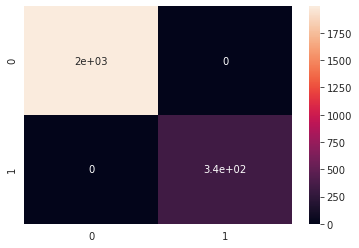

In [42]:
con_matrix = confusion_matrix(y_train, rfc.predict(X_train))
sns.heatmap(con_matrix, annot=True)

# Using Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver="liblinear", C=10)

model_testing(log)

Training Accuracy:  0.8576939562794685 

Testing Accuracy:  0.867 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.20      0.30       143

    accuracy                           0.87      1000
   macro avg       0.74      0.59      0.62      1000
weighted avg       0.84      0.87      0.84      1000



array([1, 1, 1, ..., 1, 1, 1])

In [44]:
log.intercept_

array([-0.11086042])

In [45]:
log.coef_

array([[ 0.02252864, -0.34624143,  0.65281114,  0.38528946, -0.00320877,
         0.42808604,  0.22277731,  0.27855759, -2.10606099, -0.84696892]])

In [46]:
log.predict_proba(X_train)

array([[0.72396241, 0.27603759],
       [0.95130788, 0.04869212],
       [0.94455033, 0.05544967],
       ...,
       [0.96294855, 0.03705145],
       [0.89667936, 0.10332064],
       [0.99480863, 0.00519137]])

In [47]:
confusion_matrix(y_train, log.predict(X_train))

array([[1937,   56],
       [ 276,   64]])

<AxesSubplot:>

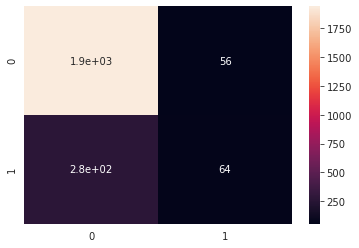

In [48]:
c_matrix = confusion_matrix(y_train, log.predict(X_train))
sns.heatmap(c_matrix, annot=True)

In [52]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator = log, param_grid  = {"C": [0.1,0.01,0.001,10,1]}, cv= 5)

In [53]:
gsc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=10, solver='liblinear'),
             param_grid={'C': [0.1, 0.01, 0.001, 10, 1]})

In [54]:
gsc.best_params_

{'C': 0.01}

In [55]:
gsc.best_score_

0.859407596658426

In [56]:
gsc.score(X_test, y_test)

0.854

# Using KNearest Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_testing(knn)


Training Accuracy:  0.9177025289327047 

Testing Accuracy:  0.897 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       857
           1       0.87      0.33      0.48       143

    accuracy                           0.90      1000
   macro avg       0.88      0.66      0.71      1000
weighted avg       0.89      0.90      0.88      1000



array([0, 0, 0, ..., 0, 0, 0])

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_testing(gbc)


Training Accuracy:  0.9558508358336906 

Testing Accuracy:  0.943 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.89      0.69      0.77       143

    accuracy                           0.94      1000
   macro avg       0.92      0.84      0.87      1000
weighted avg       0.94      0.94      0.94      1000



array([0, 0, 0, ..., 0, 0, 0])

In [59]:
gbc.predict_proba(X_train)

array([[0.9695272 , 0.0304728 ],
       [0.98226016, 0.01773984],
       [0.98200879, 0.01799121],
       ...,
       [0.96899374, 0.03100626],
       [0.97073232, 0.02926768],
       [0.98668541, 0.01331459]])

In [60]:
confusion_matrix(y_train, gbc.predict(X_train))

array([[1980,   13],
       [  90,  250]])

<AxesSubplot:>

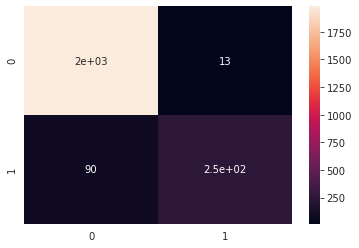

In [61]:
con_matrix = confusion_matrix(y_train, gbc.predict(X_train))
sns.heatmap(con_matrix, annot=True)

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

<b>Random Forest<b> is the best performing model:
    with Train Accuracy of 1.0
    and Test Accuracy of 0.935

The model can be improved using HyperTunning, since we do not immediately know what the optimal model architecture would be for a given model.